Import the necessary libraries.

In [1]:
from baybayin_dataset import BaybayinDataset
from baybayin_utils import pull_data, show, gen_noise, calc_gen_loss, calc_disc_loss, engine, init_weights, count_params
from baybayin_network import LinearDiscriminator, LinearGenerator
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import os

Pull the data.

In [2]:
parent_dir = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.path.pardir, os.path.pardir)), "databank/baybayin/raw")
data, labels = pull_data(path=parent_dir)

Loading a...


State hyperparameters.

In [3]:
batch_size = 128
num_epochs = 500
info_step = 500
z_dim = 784
lr = 3e-4
loss_fn = nn.BCEWithLogitsLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Call `BaybayinDataset` and `DataLoader`.

In [4]:
baybayin = BaybayinDataset(data, labels, transform=None) ## ToTensor already in `pull_data`
data_loader = DataLoader(baybayin, batch_size=batch_size, shuffle=True)

Initialize model and state optimizers.

In [5]:
gen = LinearGenerator(z_dim=z_dim).to(device)
disc = LinearDiscriminator().to(device)
gen_opt = optim.AdamW(gen.parameters(), lr=lr)
gen_sch = lr_scheduler.CosineAnnealingLR(gen_opt, T_max=num_epochs)
disc_opt = optim.AdamW(disc.parameters(), lr=lr)
disc_sch = lr_scheduler.CosineAnnealingLR(disc_opt, T_max=num_epochs)

See the number of parameters of the model (generator and discriminator).

In [6]:
_ = count_params(gen)

+----------------------------+------------+
|          Modules           | Parameters |
+----------------------------+------------+
|   gen.0.fc_layer.weight    |   25088    |
|    gen.0.fc_layer.bias     |     32     |
| gen.0.bnorm1d_layer.weight |     32     |
|  gen.0.bnorm1d_layer.bias  |     32     |
|   gen.1.fc_layer.weight    |    2048    |
|    gen.1.fc_layer.bias     |     64     |
| gen.1.bnorm1d_layer.weight |     64     |
|  gen.1.bnorm1d_layer.bias  |     64     |
|   gen.2.fc_layer.weight    |    8192    |
|    gen.2.fc_layer.bias     |    128     |
| gen.2.bnorm1d_layer.weight |    128     |
|  gen.2.bnorm1d_layer.bias  |    128     |
|   gen.3.fc_layer.weight    |   32768    |
|    gen.3.fc_layer.bias     |    256     |
| gen.3.bnorm1d_layer.weight |    256     |
|  gen.3.bnorm1d_layer.bias  |    256     |
|        gen.4.weight        |   200704   |
|         gen.4.bias         |    784     |
+----------------------------+------------+
Total Trainable Params: 271024


In [7]:
_ = count_params(disc)

+------------------------+------------+
|        Modules         | Parameters |
+------------------------+------------+
| disc.0.fc_layer.weight |   200704   |
|  disc.0.fc_layer.bias  |    256     |
| disc.1.fc_layer.weight |   32768    |
|  disc.1.fc_layer.bias  |    128     |
| disc.2.fc_layer.weight |    8192    |
|  disc.2.fc_layer.bias  |     64     |
| disc.3.fc_layer.weight |    2048    |
|  disc.3.fc_layer.bias  |     32     |
|     disc.4.weight      |     32     |
|      disc.4.bias       |     1      |
+------------------------+------------+
Total Trainable Params: 244225


Train the model.

Epoch [45/500]:   9%|▉         | 45/500 [00:13<01:14,  6.08it/s, disc_loss=0.246, disc_lr=0.000294, gen_loss=4.51, gen_lr=0.000294]

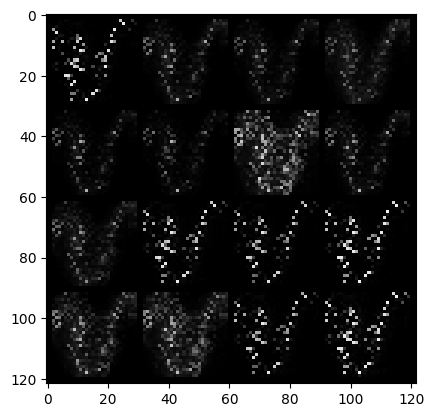

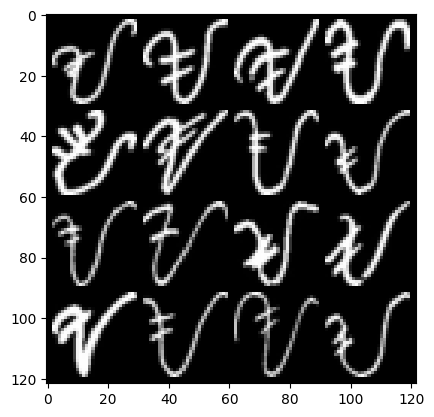

Epoch [90/500]:  18%|█▊        | 90/500 [00:21<01:09,  5.89it/s, disc_loss=0.124, disc_lr=0.000277, gen_loss=5.25, gen_lr=0.000277]

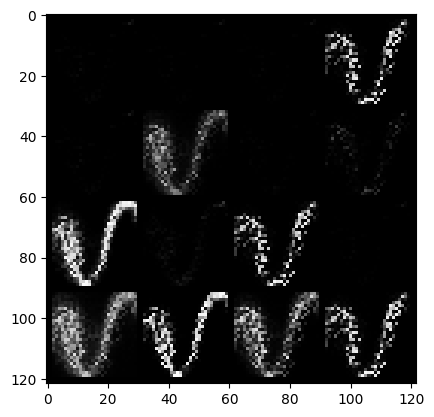

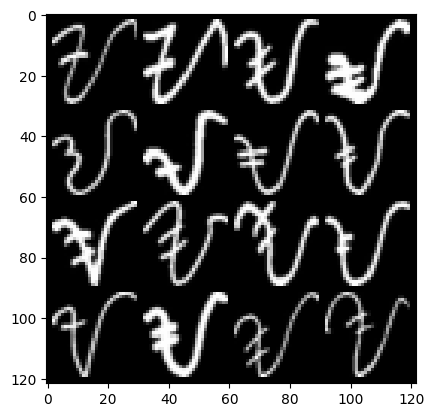

Epoch [136/500]:  27%|██▋       | 136/500 [00:29<00:59,  6.16it/s, disc_loss=0.125, disc_lr=0.000248, gen_loss=6.25, gen_lr=0.000248]

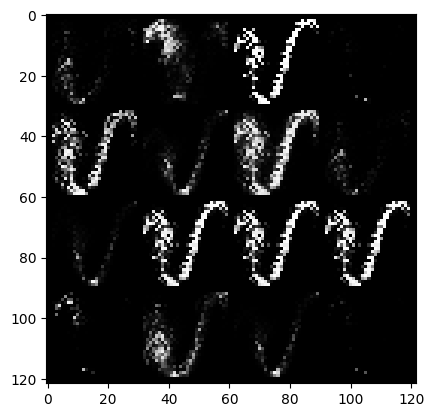

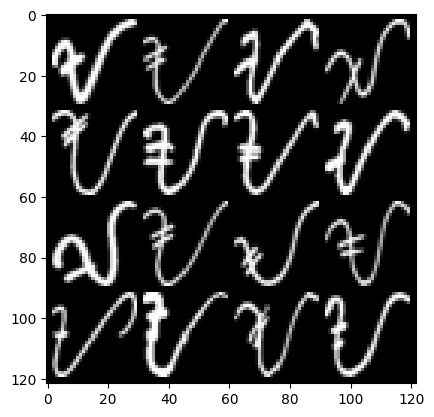

Epoch [181/500]:  36%|███▌      | 181/500 [00:36<00:51,  6.24it/s, disc_loss=0.182, disc_lr=0.000213, gen_loss=6.01, gen_lr=0.000213]

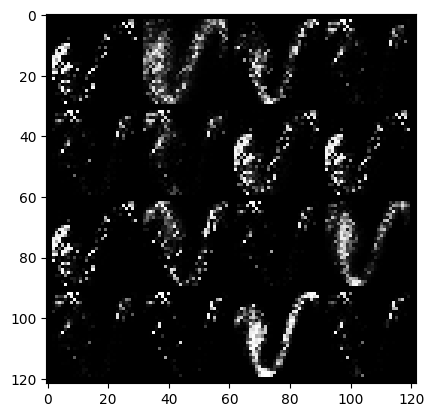

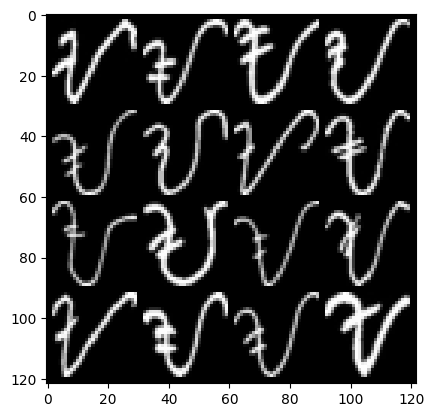

Epoch [227/500]:  45%|████▌     | 227/500 [00:44<00:45,  6.04it/s, disc_loss=0.204, disc_lr=0.000172, gen_loss=6.18, gen_lr=0.000172]

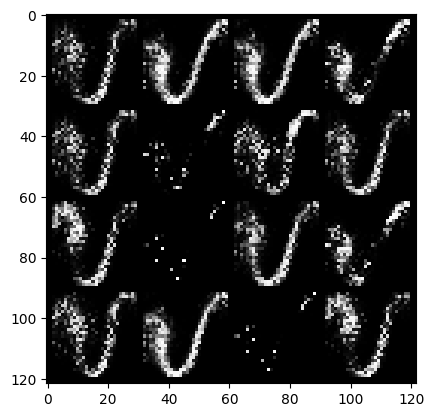

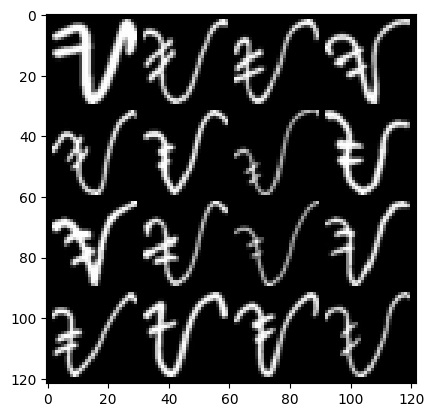

Epoch [272/500]:  54%|█████▍    | 272/500 [00:52<00:36,  6.17it/s, disc_loss=0.246, disc_lr=0.000129, gen_loss=5.49, gen_lr=0.000129]

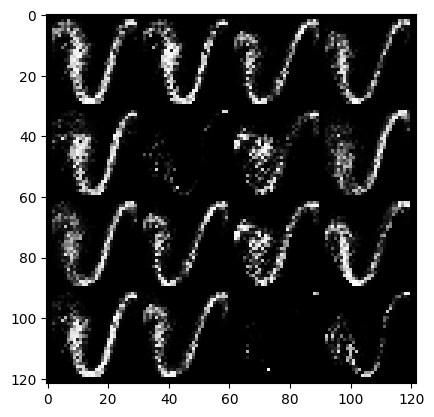

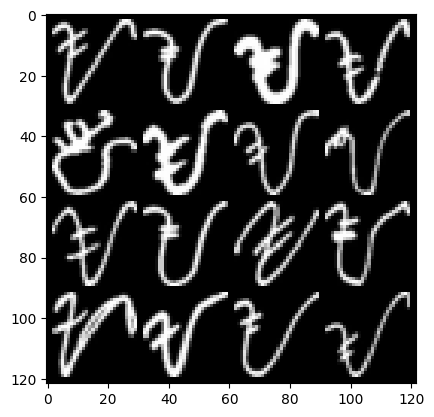

Epoch [318/500]:  64%|██████▎   | 318/500 [01:00<00:29,  6.21it/s, disc_loss=0.302, disc_lr=8.78e-5, gen_loss=3.83, gen_lr=8.78e-5]  

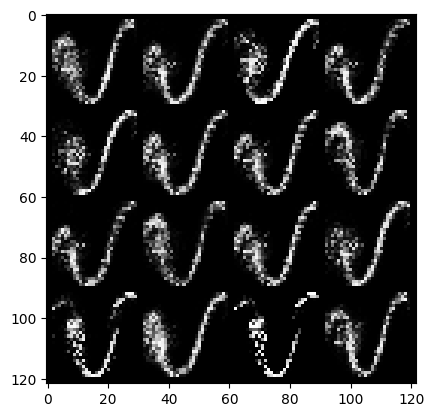

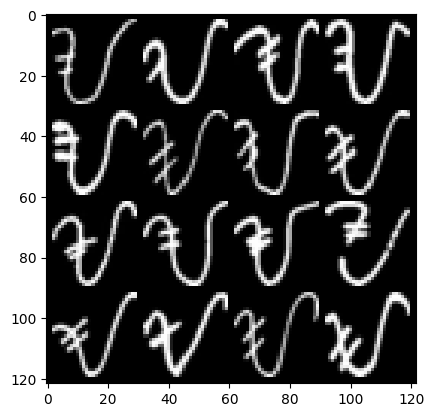

Epoch [363/500]:  73%|███████▎  | 363/500 [01:08<00:21,  6.45it/s, disc_loss=0.291, disc_lr=5.22e-5, gen_loss=3.4, gen_lr=5.22e-5] 

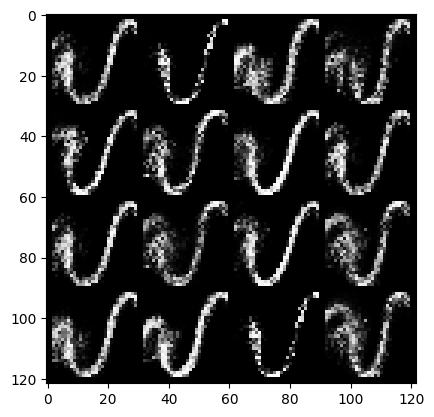

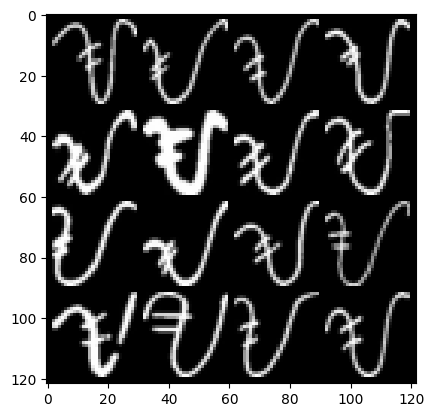

Epoch [409/500]:  82%|████████▏ | 409/500 [01:15<00:14,  6.27it/s, disc_loss=0.25, disc_lr=2.39e-5, gen_loss=3.38, gen_lr=2.39e-5]

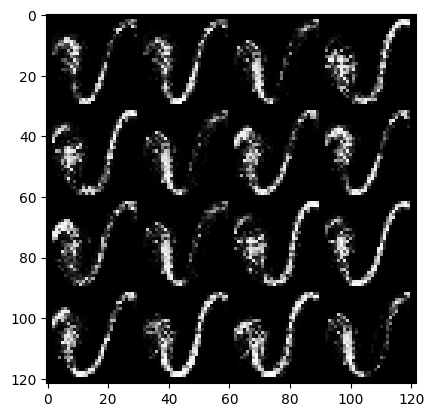

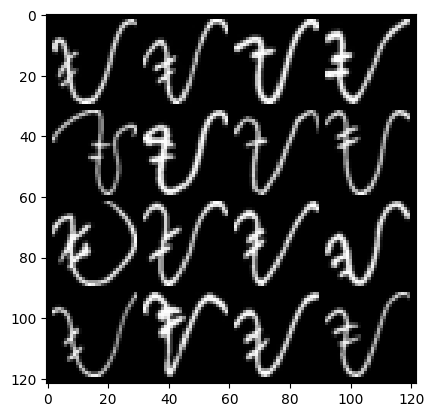

Epoch [454/500]:  91%|█████████ | 454/500 [01:23<00:07,  6.11it/s, disc_loss=0.217, disc_lr=6.22e-6, gen_loss=3.47, gen_lr=6.22e-6]

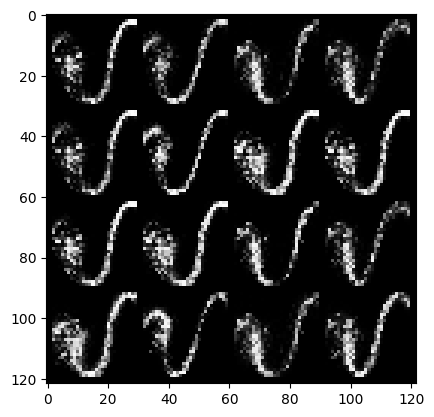

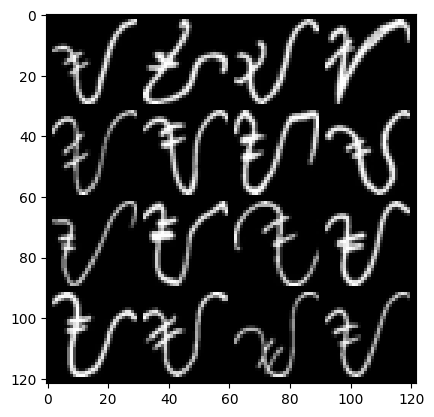

Epoch [454/500]: 100%|██████████| 500/500 [01:30<00:00,  5.51it/s, disc_loss=0.217, disc_lr=6.22e-6, gen_loss=3.47, gen_lr=6.22e-6]


In [8]:
engine(num_epochs=num_epochs, dataloader=data_loader, gen=gen, gen_opt=gen_opt, gen_sch=gen_sch,
       z_dim=z_dim, disc=disc, disc_opt=disc_opt, disc_sch=disc_sch, loss_fn=loss_fn, info_step=info_step,
       device=device)